In [4]:
using Benchmarks, GLMakie, BenchmarkTools
const B = Benchmarks

Benchmarks

In [8]:
model = LifelibBasiclife()
policies = policies_from_lifelib("basic_term/model_point_table.csv")
timings = [
  minimum(@benchmark CashFlow(Simulation($model, $policies), $(B.final_timestep[]))),
  minimum(@benchmark begin
    empty!($(B.cache_policies_inforce))
    empty!($(B.cache_premiums_pp))
    empty!($(B.cache_monthly_basic_mortality))
    sum(B.pv_net_cf())
  end),
]

2-element Vector{BenchmarkTools.TrialEstimate}:
 514.716 ms
 182.288 ms

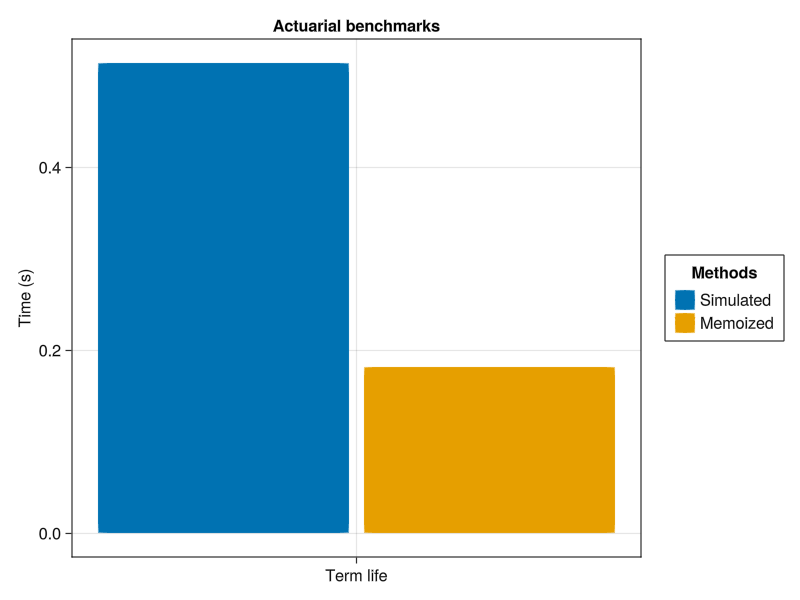

In [21]:
colors = Makie.wong_colors()
fig = Figure()
ax = Axis(fig[1, 1], title = "Actuarial benchmarks", xticks = (1:1, ["Term life"]), ylabel = "Time (s)")
bars = [1, 2]

barplot!(ax,
  [1, 1],
  getproperty.(timings, :time) .* 1e-9;
  dodge = [1, 2],
  color = colors[bars],
)

labels = ["Simulated", "Memoized"]
title = "Methods"
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
Legend(fig[1, 2], elements, labels, title)

fig